# Exploring Pokémon Through Data

This notebook is intended to be used to explore various aspects about Pokémon from the widely popular video game series under the same name.


### Where did this data come from?

I must give credit where credit is due.

I scraped all of the data that will be imported below from https://pokemonshowdown.com/ . This website is a browser based fan-made game for people to explore the various aspects of Pokémon gameplay, without having to spend the time or money on the actual video game series itself.

While this website is not official, it has a large enough player base that is dedicated to the franchise as to where their database is highly detailed and accurate. I could have pulled this information from an official Pokémon wiki or other web source, but I found that those other websites tended to be muddled with extra ads, useless information, and css styling that was difficult to get around with my web scraping methods.

Speaking of web scraping, I wrote up a script using python and making use of [Selenium](https://www.selenium.dev/) and [Gecko Driver](https://github.com/mozilla/geckodriver/releases). Using these tools, it only took me slightly less than a week to write a script and grab this data.

### What does the data include?

This data includes the following:
* ID: The ID of the pokemon in the National Pokédex
* Name: The official name of the Pokémon
* Subname: Sometimes a Pokémon has more than one form (such as alolan form or a mega evolution). These are represented here as different entities.
* Generation: This is the generation that the Pokémon is considered to be from. This generally corresponds to the game(s) that each pokemon was released with.
* Sprite: On Pokémon Showdown, each Pokémon had a sprite that was used for the game. I have the link to that sprite for possible use later.
* Icon Locations: Each Pokémon, aside from their sprite, also has an 40 by 30 pixel icon. This icon is on a sprite sheet that you can view [here](https://play.pokemonshowdown.com/sprites/pokemonicons-sheet.png?g8)
* Tier: This is a stat that is specific to Pokémon Showdown. They have their own specific set of rules to moderate gameplay on their website, and these tiers are a specification on what pokemon are allowed to be used where.
* Type 1 and 2: Pokémon can have up to two types (minimum of 1). This defines what moves that will be resistant or susceptable to.
* Abilities: A Pokémon can have one ability from a list of up to 4. 1 and 2 can appear naturally in the game, Hidden abilities must be on the pokemon from birth, and the rare special ability each have special circumstances surrounding their usage.
* Egg Groups: These groups determine what Pokémon can breed with eachother.
* HP, ATK, DEF, SPA, SPD, SPE, and BST: These are representations of each Pokémon's base stats.
* Size: While generally not useful for gameplay, it is an interesting stat that specifies the Pokémon's length in meters
* Weight: Rarely useful in gameplay, but again, it is an interesting stat that specifies the Pokémon's weight in kilograms.
* Gender Ratio: This is ration in which Pokémon can be found in the wild.
* Color: The games assign each Pokémon a single color, even though their sprites can be made up of many.
* Link: This is the link to the individal page of each Pokémon.

## Let's Wrangle!

### Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hb33green/Pokemon-Test/master/pokemon.csv')
data.head()

,ID,Name,Subname,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
0,1,Bulbasaur,None,1,https://play.pokemonshowdown.com/sprites/gen5/...,-40px 0px;,LC,GRASS,POISON,Overgrow,...,49,65,65,45,318,0.7 m,6.9 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/bulbasaur
1,2,Ivysaur,None,1,https://play.pokemonshowdown.com/sprites/gen5/...,-80px 0px;,NFE,GRASS,POISON,Overgrow,...,63,80,80,60,405,1 m,13 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/ivysaur
2,3,Venusaur,None,1,https://play.pokemonshowdown.com/sprites/gen5/...,-120px 0px;,UU,GRASS,POISON,Overgrow,...,83,100,100,80,525,2 m,100 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/venusaur
3,3,Venusaur,Mega,1,https://play.pokemonshowdown.com/sprites/gen5/...,0px -2760px;,Illegal,GRASS,POISON,Thick Fat,...,123,122,120,80,625,2.4 m,155.5 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/venusa...
4,4,Charmander,None,1,https://play.pokemonshowdown.com/sprites/gen5/...,-160px 0px;,LC,FIRE,None,Blaze,...,43,60,50,65,309,0.6 m,8.5 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charma...


### Sorting out unwanted Pokémon

While Pokémon Showdown was a great resource for getting this information, it still had lot's of things that I'm not particularly interested in. For instance, they included stats on many Glitch Pokémon that can only be aquired through hacking or glitching the games. For the purposes of most of my explorations, I will be considering them as outliers and remove them from the data.

They also included custom Pokémon that was made by the developers of Pokémon showdown for fun. Since my purpose today is to explore Pokémon, and not Pokémon Showdown, I will also be removing these.

In [3]:
#The bottom of the set before removing unwanted items
data.tail()

,ID,Name,Subname,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
1196,None,Pokestar Spirit,None,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,DARK,GHOST,Wonder Guard,...,100,100,100,100,600,1.5 m,61 kg,50% male 50% female,White,https://dex.pokemonshowdown.com/pokemon/pokest...
1197,None,Pokestar Black Door,None,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,GRASS,None,Early Bird,...,100,100,100,100,600,1.5 m,61 kg,100% female,White,https://dex.pokemonshowdown.com/pokemon/pokest...
1198,None,Pokestar White Door,None,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,FIRE,None,Blaze,...,100,100,100,100,600,1.5 m,61 kg,100% male,White,https://dex.pokemonshowdown.com/pokemon/pokest...
1199,None,Pokestar Black Belt,None,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,FIGHTING,None,Huge Power,...,100,100,100,100,600,1.5 m,61 kg,100% male,White,https://dex.pokemonshowdown.com/pokemon/pokest...
1200,None,Pokestar UFO,PropU2,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,PSYCHIC,ELECTRIC,Levitate,...,100,100,100,100,600,1.5 m,61 kg,100% genderless,White,https://dex.pokemonshowdown.com/pokemon/pokest...


In [4]:
#The bottom of the set after removing unwanted items
data_clean = data[(data.Generation != "CAP") & (data.Generation != "glitch")]
data_clean.tail()

,ID,Name,Subname,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
1123,888,Zacian,Crowned,8,https://play.pokemonshowdown.com/sprites/gen5/...,-80px -2730px;,Uber,FAIRY,STEEL,Intrepid Sword,...,115,80,115,148,720,2.8 m,355 kg,100% genderless,Blue,https://dex.pokemonshowdown.com/pokemon/zacian...
1124,889,Zamazenta,None,8,https://play.pokemonshowdown.com/sprites/gen5/...,-40px -2220px;,Uber,FIGHTING,None,Dauntless Shield,...,115,80,115,138,670,2.9 m,210 kg,100% genderless,Red,https://dex.pokemonshowdown.com/pokemon/zamazenta
1125,889,Zamazenta,Crowned,8,https://play.pokemonshowdown.com/sprites/gen5/...,-120px -2730px;,Uber,FIGHTING,STEEL,Dauntless Shield,...,145,80,145,128,720,2.9 m,785 kg,100% genderless,Red,https://dex.pokemonshowdown.com/pokemon/zamaze...
1126,890,Eternatus,None,8,https://play.pokemonshowdown.com/sprites/gen5/...,-80px -2220px;,Uber,POISON,DRAGON,Pressure,...,95,145,95,130,690,20 m,950 kg,100% genderless,Purple,https://dex.pokemonshowdown.com/pokemon/eternatus
1127,890,Eternatus,Eternamax,8,https://play.pokemonshowdown.com/sprites/gen5/...,-160px -2940px;,Illegal,POISON,DRAGON,Pressure,...,250,125,250,130,1125,100 m,0 kg,100% genderless,Purple,https://dex.pokemonshowdown.com/pokemon/eterna...


### Cleaning up errors in the scraping process

Luckily, I was able to catch most of the errors that occured in the scraping process by hand, but I wanted to actually fix them here in order to showcase the cool niche cases of Pokémon.

The first Pokémon is incorrect because of a syntax difference. This is the Pokémon Ho-Oh, who happens to be the only Pokémon with a hyphenated name. All the other Pokémon on Pokémon Showdown used a hyphen to seperate the name of the Pokémon from the name of the specific form. Therefore the scraper mistook 'Oh' for a form of a Pokémon named 'Ho'.

The second Pokémon is the result of the limitations of csv file types. You can look up this Pokémon by its ID number and discover that its name is Flabébé. This is the only Pokémon that utilizes a special character in its name, and the csv didn't know what to do with it.

In [5]:
offender_1 = data_clean[data_clean.Subname == 'Oh']
offender_2 = data_clean[data_clean.Name == 'None']
offender_1.append(offender_2)[['ID','Name','Subname']]

,ID,Name,Subname
323,250,Ho,Oh
827,669,None,None


This is an easy fix.

In [6]:
data_clean.at[323, 'Name'] = 'Ho-Oh'
data_clean.at[323, 'Subname'] = None
data_clean.at[827, 'Name'] = 'Flabébé'
data_clean[data_clean.Name == 'Ho-Oh'].append(data_clean[data_clean.Name == 'Flabébé'])[['ID','Name','Subname']]

,ID,Name,Subname
323,250,Ho-Oh,None
827,669,Flabébé,None


### Making the data manageable

There's lots of different parts and pieces to this data and lots of different things that can be explored. However I don't want to have to be worrying about columns that I won't be using in certain explorations, so I'm going to split everything up into multiple dataframes that contain just the elements that I want to work with.

The first thing I know is that I'm generally uninterested in alternate forms of the Pokémon, so I'll be removing any Pokémon with a Subname.

In [7]:
regular_pokemon = data_clean[data_clean.Subname == 'None'].drop(['Subname'], axis=1)
regular_pokemon.head()

,ID,Name,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,Ability 2,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
0,1,Bulbasaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-40px 0px;,LC,GRASS,POISON,Overgrow,None,...,49,65,65,45,318,0.7 m,6.9 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/bulbasaur
1,2,Ivysaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-80px 0px;,NFE,GRASS,POISON,Overgrow,None,...,63,80,80,60,405,1 m,13 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/ivysaur
2,3,Venusaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-120px 0px;,UU,GRASS,POISON,Overgrow,None,...,83,100,100,80,525,2 m,100 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/venusaur
4,4,Charmander,1,https://play.pokemonshowdown.com/sprites/gen5/...,-160px 0px;,LC,FIRE,None,Blaze,None,...,43,60,50,65,309,0.6 m,8.5 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charma...
5,5,Charmeleon,1,https://play.pokemonshowdown.com/sprites/gen5/...,-200px 0px;,NFE,FIRE,None,Blaze,None,...,58,80,65,80,405,1.1 m,19 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charme...


I also know that without alternate forms involved, the ID of the Pokémon is going to be unique, so we can use that number for indexing.

In [8]:
regular_pokemon = regular_pokemon.set_index(['ID'])
regular_pokemon.head()

,Name,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,Ability 2,Hidden Ability,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
ID,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-40px 0px;,LC,GRASS,POISON,Overgrow,None,Chlorophyll,...,49,65,65,45,318,0.7 m,6.9 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/bulbasaur
2,Ivysaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-80px 0px;,NFE,GRASS,POISON,Overgrow,None,Chlorophyll,...,63,80,80,60,405,1 m,13 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/ivysaur
3,Venusaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-120px 0px;,UU,GRASS,POISON,Overgrow,None,Chlorophyll,...,83,100,100,80,525,2 m,100 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/venusaur
4,Charmander,1,https://play.pokemonshowdown.com/sprites/gen5/...,-160px 0px;,LC,FIRE,None,Blaze,None,Solar Power,...,43,60,50,65,309,0.6 m,8.5 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charma...
5,Charmeleon,1,https://play.pokemonshowdown.com/sprites/gen5/...,-200px 0px;,NFE,FIRE,None,Blaze,None,Solar Power,...,58,80,65,80,405,1.1 m,19 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charme...


### The fun stuff

#### Typing

The first thing I want to do is simplify the dataframe into something more manageable by getting rid of the columns that I don't need for exploring typing.

In [9]:
pokemon_typing = regular_pokemon[['Name','Generation','Type 1', 'Type 2']]
pokemon_typing.head()

,Name,Generation,Type 1,Type 2
ID,,,,
1,Bulbasaur,1,GRASS,POISON
2,Ivysaur,1,GRASS,POISON
3,Venusaur,1,GRASS,POISON
4,Charmander,1,FIRE,None
5,Charmeleon,1,FIRE,None


Secondly, I want to start off with confirming how many different types are possible for a Pokémon. I know that for each type, there is going to be at least one Pokémon that solely has that type. Therefore I can just find all of the unique values in the Type 1 column.

In [10]:
types = np.unique(pokemon_typing['Type 1'].tolist())
types

array(['BUG', 'DARK', 'DRAGON', 'ELECTRIC', 'FAIRY', 'FIGHTING', 'FIRE',
       'FLYING', 'GHOST', 'GRASS', 'GROUND', 'ICE', 'NORMAL', 'POISON',
       'PSYCHIC', 'ROCK', 'STEEL', 'WATER'], dtype='<U8')

Now I'm curious to see how many of each type exists.

In [11]:
typing_in_order = pokemon_typing.rename(columns = {'Type 1' : 'Type_1', 'Type 2' : 'Type_2'}).set_index(['Type_1', 'Type_2']).sort_index()
typing_in_order.head()

for i in types :
    total_num = len(typing_in_order.query('Type_1 == @i')) + len(typing_in_order.query('Type_2 == @i'))
    single_type = len(typing_in_order.query('Type_1 == @i & Type_2 == "None"'))
    dual_type = total_num - single_type
    print(i + ": " + str(single_type) + " Single Type, " + str(dual_type) + " Dual Type, " + str(total_num) + " Total.")

BUG: 19 Single Type, 65 Dual Type, 84 Total.
DARK: 11 Single Type, 42 Dual Type, 53 Total.
DRAGON: 11 Single Type, 41 Dual Type, 52 Total.
ELECTRIC: 31 Single Type, 25 Dual Type, 56 Total.
FAIRY: 19 Single Type, 35 Dual Type, 54 Total.
FIGHTING: 27 Single Type, 30 Dual Type, 57 Total.
FIRE: 33 Single Type, 37 Dual Type, 70 Total.
FLYING: 3 Single Type, 98 Dual Type, 101 Total.
GHOST: 12 Single Type, 38 Dual Type, 50 Total.
GRASS: 43 Single Type, 62 Dual Type, 105 Total.
GROUND: 17 Single Type, 50 Dual Type, 67 Total.
ICE: 13 Single Type, 27 Dual Type, 40 Total.
NORMAL: 68 Single Type, 46 Dual Type, 114 Total.
POISON: 14 Single Type, 53 Dual Type, 67 Total.
PSYCHIC: 37 Single Type, 52 Dual Type, 89 Total.
ROCK: 13 Single Type, 52 Dual Type, 65 Total.
STEEL: 9 Single Type, 45 Dual Type, 54 Total.
WATER: 67 Single Type, 74 Dual Type, 141 Total.


The first thing to take note of is that there are more Water type Pokémon than any other type. They have the most Single Type Pokémon, and the second most Dual Type Pokémon. Let's take a look at how this has changed over the generations.

In [12]:
import matplotlib.pyplot as plt

water_types = typing_in_order.query('Type_1 == "WATER" | Type_2 == "WATER"').set_index(['Generation']).sort_index()
water_types.head()

,Name
Generation,
1,Kingler
1,Gyarados
1,Vaporeon
1,Magikarp
1,Staryu


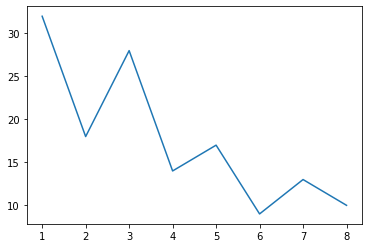

In [13]:
water_type_lengths = []
for i in range(1,9) :
    water_type_lengths.append(len(water_types.loc[str(i)]))

plt.plot(range(1,9),water_type_lengths);

We can see that overall, there is a general trend downwards with each odd numbered generation increasing in the amount of new water types added, and each even numbered generation decreasing in the amount of new water types added.

Let's repeat this process, but for each Type.

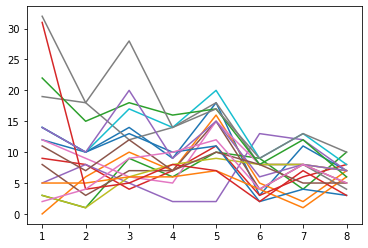

In [14]:
all_lengths = []
for i in types :
    cur_type = typing_in_order.query('Type_1 == @i | Type_2 == @i').set_index(['Generation']).sort_index()
    for j in range(1,9) :
        all_lengths.append(len(cur_type.loc[cur_type.index == str(j)]))
all_lengths = np.asarray(all_lengths).reshape(18, 8)

for i in all_lengths :
    plt.plot(range(1,9), i);

The plot is a bit muddled, but it seems as if all of the typing follows the same general trend with a few rare exceptions.